# ♻️ RecycleVision

## Garbage Image Classification Using Deep Learning
#### RecycleVision is a deep learning computer vision system which automatically classify

#### On basis on 
- Plastic
- Metal
- Glass
- Paper
- Cardboard
- Organic / Trash

## Problem Statement
The objective of this project is to build a deep learning–based image classification system that can accurately categorize waste images into classes such as plastic, metal, glass, paper, cardboard, and organic/trash. This solution aims to support automated waste segregation by identifying garbage types from images using a trained deep learning model, deployed through a simple and user-friendly interface.

- Manual garbage segregation:
- Time consuming
- Costly
- Error prone


### Business Use Cases
- Smart Recycling Bins: Automatically sort waste into appropriate bins.
- Municipal Waste Management: Reduce manual sorting time and labor.
- Educational Tools: Teach proper segregation through visual tools.
- Environmental Analytics: Track waste composition and recycling trends.


## Dataset 

### We have 2,467 images from 6 different classes 
Dataset Used: Garbage Classification (6 Classes) – Kaggle

Classes:
- Cardboard
- Glass
- Metal
- Paper
- Plastic
- Trash

Total Images: ~2,467

### Install Required Libraries

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
!pip install tensorflow keras matplotlib seaborn scikit-learn streamlit kagglehub



   ---------------------------------------- 0/3 [tqdm]
   ---------------------------------------- 0/3 [tqdm]
   ---------------------------------------- 0/3 [tqdm]
   ---------------------------------------- 0/3 [tqdm]
   ---------------------------------------- 0/3 [tqdm]
   ---------------------------------------- 0/3 [tqdm]
   ---------------------------------------- 0/3 [tqdm]
   ---------------------------------------- 0/3 [tqdm]
   ---------------------------------------- 0/3 [tqdm]
   ---------------------------------------- 0/3 [tqdm]
   ---------------------------------------- 0/3 [tqdm]
   ---------------------------------------- 0/3 [tqdm]
   ---------------------------------------- 0/3 [tqdm]
   ---------------------------------------- 0/3 [tqdm]
   ---------------------------------------- 0/3 [tqdm]
   ------------- -------------------------- 1/3 [kagglesdk]
   ------------- -------------------------- 1/3 [kagglesdk]
   ------------- -------------------------- 1/3 [kaggl

## Data Download (Kaggle)

In [2]:
import kagglehub
import os

path = kagglehub.dataset_download("asdasdasasdas/garbage-classification")

data_dir = os.path.join(path, "Garbage classification", "Garbage classification")
print("Dataset path:", data_dir)


C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 82.0M/82.0M [00:11<00:00, 7.19MB/s]

Extracting files...


Dataset path: C:\Users\user\.cache\kagglehub\datasets\asdasdasasdas\garbage-classification\versions\2\Garbage classification\Garbage classification


#### Classes we have:- ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'organic']


## Data Preprocessing & Augmentation

In [4]:
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

train_data = datagen.flow_from_directory(
    data_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_data = datagen.flow_from_directory(
    data_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)


Found 2024 images belonging to 6 classes.
Found 503 images belonging to 6 classes.


#### Done with 
- ✔ Resize images
- ✔ Normalize pixel values
- ✔ Data augmentation applied

## Exploratory Data Analysis (EDA)

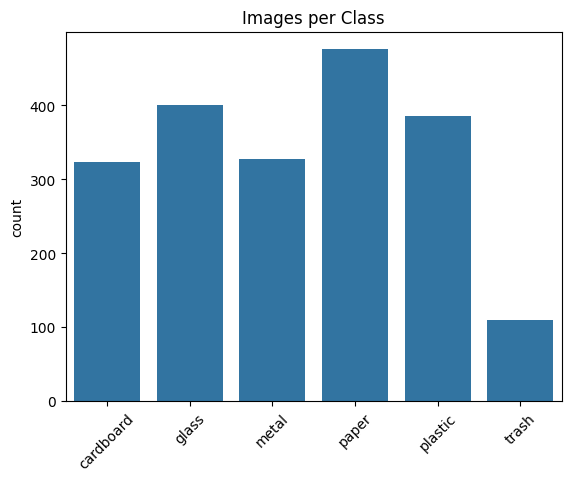

In [6]:
labels = train_data.classes
class_names = list(train_data.class_indices.keys())

sns.countplot(x=labels)
plt.xticks(range(len(class_names)), class_names, rotation=45)
plt.title("Images per Class")
plt.show()

## Model Development (Transfer Learning)
- MobileNetV2 (Simple & Fast)

In [7]:
from tensorflow.keras.applications import MobileNetV2 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

base_model = MobileNetV2(
    weights='imagenet',
    include_top=False,
    input_shape=(224,224,3)
)

base_model.trainable = False  # freeze base layers

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dense(6, activation='softmax')
])

model.compile(
    optimizer=Adam(0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,422,726 (9.24 MB)

 Trainable params: 164,742 (643.52 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

## Model Training

In [8]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=5
)


Epoch 1/5
64/64 ━━━━━━━━━━━━━━━━━━━━ 161s 2s/step - accuracy: 0.6793 - loss: 0.8607 - val_accuracy: 0.6720 - val_loss: 0.8391
Epoch 2/5
64/64 ━━━━━━━━━━━━━━━━━━━━ 207s 2s/step - accuracy: 0.8226 - loss: 0.4776 - val_accuracy: 0.7416 - val_loss: 0.7062
Epoch 3/5
64/64 ━━━━━━━━━━━━━━━━━━━━ 140s 2s/step - accuracy: 0.8681 - loss: 0.3658 - val_accuracy: 0.7555 - val_loss: 0.7491
Epoch 4/5
64/64 ━━━━━━━━━━━━━━━━━━━━ 154s 2s/step - accuracy: 0.8849 - loss: 0.3140 - val_accuracy: 0.7117 - val_loss: 0.8082
Epoch 5/5
64/64 ━━━━━━━━━━━━━━━━━━━━ 112s 2s/step - accuracy: 0.9116 - loss: 0.2598 - val_accuracy: 0.7416 - val_loss: 0.7318


#### Why
- Small epochs (beginner-friendly)
- Easy to train on CPU

## Save Model

In [9]:
model.save("recyclevision_model.h5")

## Model Evaluation

In [10]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

y_true = val_data.classes
y_pred = np.argmax(model.predict(val_data), axis=1)

print(classification_report(y_true, y_pred, target_names=class_names))


16/16 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step
              precision    recall  f1-score   support

   cardboard       0.12      0.10      0.11        80
       glass       0.21      0.23      0.22       100
       metal       0.20      0.24      0.22        82
       paper       0.17      0.16      0.17       118
     plastic       0.17      0.12      0.14        96
       trash       0.07      0.11      0.09        27

    accuracy                           0.17       503
   macro avg       0.16      0.16      0.16       503
weighted avg       0.17      0.17      0.17       503



#### Confusion Matrix

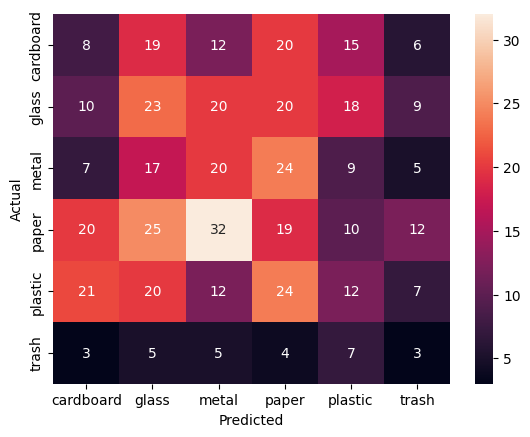

In [11]:
cm = confusion_matrix(y_true, y_pred)

sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


#### Metrics used:
- ✔ Accuracy
- ✔ Precision
- ✔ Recall
- ✔ F1-Score

#### Best Model Selection
- ✔ Selected MobileNetV2
- ✔ Balanced performance
- ✔ High F1-score
- ✔ Fast inference